# Chuẩn đoán SARS-CoV-2 (COVID-19)

<br/>
<a href="https://github.com/18520339/covid19-diagnosis/subscription" style="display:inline-block; margin:2px;"> 
    <img src="https://img.shields.io/github/watchers/18520339/covid19-diagnosis?style=social" />
</a>
<a href="https://github.com/18520339/covid19-diagnosis/fork" style="display:inline-block; margin:2px;"> 
    <img src="https://img.shields.io/github/forks/18520339/covid19-diagnosis?style=social" />
</a>

### Dataset

Dataset chứa 1252 ảnh chụp CT dương tính với SARS-CoV-2 (COVID-19) và 1229 ảnh chụp CT cho bệnh nhân không bị nhiễm SARS-CoV-2, tổng cộng gồm 2481 ảnh

Nguồn: [SARS-COV-2 Ct-Scan Dataset](https://www.kaggle.com/plameneduardo/sarscov2-ctscan-dataset).

### Cách triển khai
1. Chia dataset thành 3 bộ: 
    - `train`: chiếm 80% dataset
    - `validate`: sẽ được trích ra từ tập train
    - `test`: chiếm 20% dataset

2. Bài toán sẽ được giải quyết theo 2 hướng: học máy và học sâu

### Cách đánh giá
- Accuracy score
- Confusion matrix
- Precision, Recall và F1-score
- ROC Curve

# Xây dựng model bằng các thuật toán Machine Learning truyền thống

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [3]:
COVID_PATH = 'dataset/COVID/'
NONCOVID_PATH = 'dataset/NONCOVID/'
VISUALIZE_PATH = 'visualize/'
MODELS_PATH = 'models/'
TEST_IMAGE = 'test.png'
HEIGHT = 75
WIDTH = 75

In [4]:
COVID_IMAGE_NAMES = os.listdir(COVID_PATH)
NONCOVID_IMAGE_NAMES = os.listdir(NONCOVID_PATH)

## 1. Đọc dữ liệu

In [5]:
import cv2

COVID_images = [cv2.imread(COVID_PATH + name, 0) for name in COVID_IMAGE_NAMES]
NONCOVID_images = [cv2.imread(NONCOVID_PATH + name, 0) for name in NONCOVID_IMAGE_NAMES]

print('Số lượng ảnh phổi bị nhiễm COVID:', len(COVID_images))
print('Số lượng ảnh phổi không bị nhiễm COVID:', len(NONCOVID_images))

Số lượng ảnh phổi bị nhiễm COVID: 1252
Số lượng ảnh phổi không bị nhiễm COVID: 1229


#### => Dữ liệu khá cân bằng

### a. Một số ảnh X-quang của phổi bị nhiễm COVID 19

In [6]:
def display_images(list_images, figsize, figname):
    plt.figure(figsize = figsize)
    for i in np.arange(0, 50, 5):
        plt.subplot(2, 5, i / 5 + 1)
        plt.imshow(list_images[i], cmap = 'gray')
        plt.title('image ' + str(i) + ' ' + str(list_images[i].shape))
    plt.suptitle(figname, fontsize=15)
    plt.show()

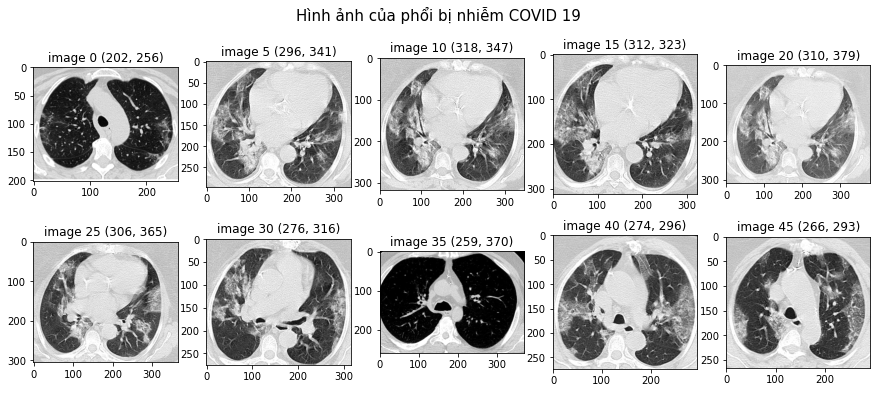

In [7]:
display_images(COVID_images, (15, 6), "Hình ảnh của phổi bị nhiễm COVID 19")

In [8]:
# Biểu diễn ở dạng ma trận
print('Kích thước hình ảnh thứ 0:', COVID_images[0].shape)
COVID_images[0]

Kích thước hình ảnh thứ 0: (202, 256)


array([[190, 197, 202, ..., 200, 191, 193],
       [189, 196, 194, ..., 202, 200, 188],
       [195, 202, 199, ..., 197, 194, 190],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

### b. Một số ảnh X-quang của phổi  bị không nhiễm COVID 19

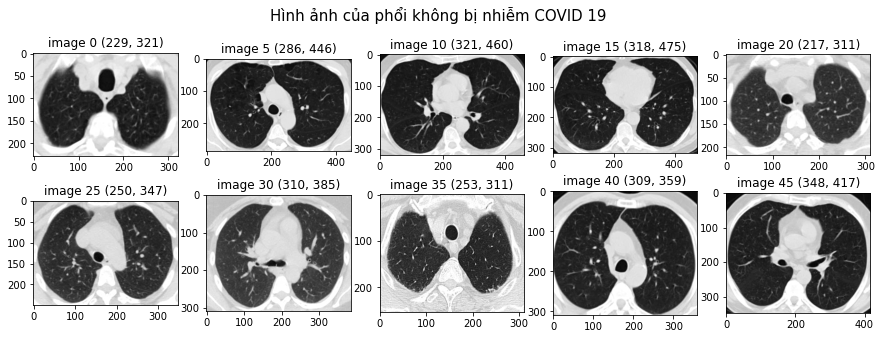

In [9]:
display_images(NONCOVID_images, (15, 5), "Hình ảnh của phổi không bị nhiễm COVID 19")

In [10]:
# Biểu diễn ở dạng ma trận
print('Kích thước hình ảnh thứ 0:', NONCOVID_images[0].shape)
NONCOVID_images[0]

Kích thước hình ảnh thứ 0: (229, 321)


array([[221, 213, 205, ..., 210, 209, 211],
       [217, 212, 206, ..., 212, 210, 212],
       [211, 209, 208, ..., 213, 210, 209],
       ...,
       [240, 243, 248, ..., 245, 243, 235],
       [237, 239, 243, ..., 234, 232, 233],
       [239, 239, 239, ..., 232, 232, 233]], dtype=uint8)

## 2. Tiền xử lý dữ liệu

### a. Chuẩn hóa kích thước hình ảnh

In [11]:
resize_COVID_images = [cv2.resize(img, (WIDTH, HEIGHT)) for img in COVID_images]
resize_NONCOVID_images = [cv2.resize(img, (WIDTH, HEIGHT)) for img in NONCOVID_images]

### b. Chuyển đổi hình ảnh về dạng ma trận 1 chiều (1 x m)

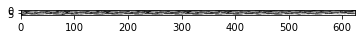

In [12]:
# Kích thước ảnh từ 75x75 thành 9x625
plt.imshow(resize_COVID_images[0].reshape(-1, 625), cmap = 'gray')
plt.show()

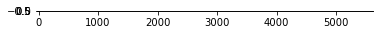

In [13]:
# Kích thước ảnh từ 75x75 thành 1x5625
plt.imshow(resize_COVID_images[0].reshape(-1, WIDTH * HEIGHT), cmap = 'gray')
plt.show()

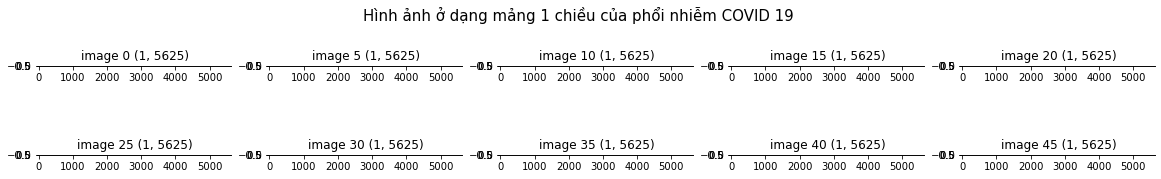

In [14]:
reshape_COVID_images = [img.reshape(-1, WIDTH * HEIGHT) for img in resize_COVID_images]
display_images(reshape_COVID_images, (20, 3), "Hình ảnh ở dạng mảng 1 chiều của phổi nhiễm COVID 19")

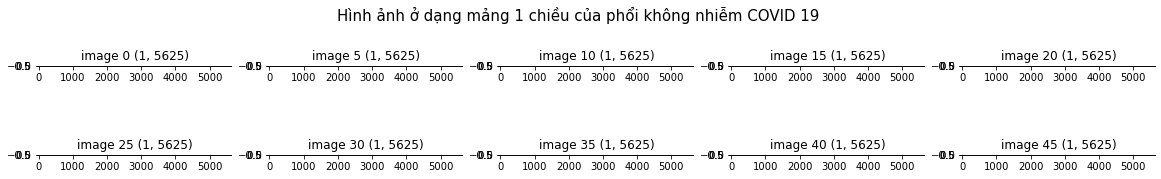

In [15]:
reshape_NONCOVID_images = [img.reshape(-1, WIDTH * HEIGHT) for img in resize_NONCOVID_images]
display_images(reshape_NONCOVID_images, (20, 3), "Hình ảnh ở dạng mảng 1 chiều của phổi không nhiễm COVID 19")

In [16]:
# Mỗi dòng trong DataFrame sẽ tương đương 1 hình ảnh
# Mỗi cột sẽ tương đương từng pixel của tấm ảnh đó
data = pd.DataFrame(np.concatenate(reshape_COVID_images + reshape_NONCOVID_images))
data.columns = ['pixel ' + str(col) for col in data.columns]
data

,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 5615,pixel 5616,pixel 5617,pixel 5618,pixel 5619,pixel 5620,pixel 5621,pixel 5622,pixel 5623,pixel 5624
0,196,193,195,194,194,193,193,194,192,190,...,255,255,255,255,255,255,255,255,255,255
1,196,195,193,194,196,197,194,194,195,192,...,51,51,50,56,50,58,89,244,174,88
2,204,195,185,195,202,193,193,190,198,209,...,220,228,237,235,230,227,222,219,219,223
3,215,210,209,204,198,200,202,202,215,211,...,208,192,201,207,211,204,210,206,207,228
4,210,213,204,221,223,207,206,207,201,210,...,212,208,201,199,204,211,203,198,206,209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2476,65,62,65,62,65,65,67,69,228,206,...,234,246,88,110,212,210,73,66,74,77
2477,62,64,66,64,64,66,67,66,67,62,...,214,233,250,99,68,65,99,155,249,107
2478,67,67,64,64,64,64,66,67,68,68,...,209,244,248,62,67,63,82,111,144,109
2479,63,64,64,67,65,63,65,64,63,71,...,214,207,199,216,252,70,63,59,75,130


### c. Feature scaling

In [17]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [18]:
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns = list(data.columns))
scaled_data.head()

,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 5615,pixel 5616,pixel 5617,pixel 5618,pixel 5619,pixel 5620,pixel 5621,pixel 5622,pixel 5623,pixel 5624
0,0.773054,0.665264,0.628488,0.552422,0.487997,0.396642,0.332869,0.285001,0.171847,0.060478,...,1.239647,1.172068,1.124518,1.102053,1.092620,1.108758,1.132558,1.162563,1.202387,1.230230
1,0.773054,0.692844,0.600560,0.552422,0.516982,0.456487,0.348330,0.285001,0.222957,0.096456,...,-4.626240,-4.052765,-3.632216,-3.117611,-2.828438,-2.377067,-1.624013,0.989719,-0.006267,-1.168362
2,0.882333,0.692844,0.488845,0.566587,0.603938,0.396642,0.332869,0.220975,0.274066,0.402267,...,0.233245,0.480546,0.706853,0.677966,0.614442,0.613311,0.584565,0.596890,0.665207,0.770620
3,1.032591,0.899692,0.823988,0.694065,0.545967,0.501372,0.472018,0.413053,0.563685,0.438245,...,-0.111807,-0.441483,-0.128475,0.084245,0.251027,0.206336,0.385294,0.392619,0.486148,0.842434
4,0.964292,0.941061,0.754167,0.934857,0.908281,0.606101,0.533861,0.493086,0.325175,0.420256,...,0.003210,-0.031692,-0.128475,-0.085390,0.117137,0.330198,0.269054,0.266914,0.471226,0.569540


### d. Gán nhãn cho dữ liệu

In [19]:
COVID_labels = np.repeat(1, len(COVID_images))[:, np.newaxis]
NONCOVID_labels = np.repeat(0, len(NONCOVID_images))[:, np.newaxis]

scaled_data['label'] = np.concatenate([COVID_labels, NONCOVID_labels])
scaled_data.head()

,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 5616,pixel 5617,pixel 5618,pixel 5619,pixel 5620,pixel 5621,pixel 5622,pixel 5623,pixel 5624,label
0,0.773054,0.665264,0.628488,0.552422,0.487997,0.396642,0.332869,0.285001,0.171847,0.060478,...,1.172068,1.124518,1.102053,1.092620,1.108758,1.132558,1.162563,1.202387,1.230230,1
1,0.773054,0.692844,0.600560,0.552422,0.516982,0.456487,0.348330,0.285001,0.222957,0.096456,...,-4.052765,-3.632216,-3.117611,-2.828438,-2.377067,-1.624013,0.989719,-0.006267,-1.168362,1
2,0.882333,0.692844,0.488845,0.566587,0.603938,0.396642,0.332869,0.220975,0.274066,0.402267,...,0.480546,0.706853,0.677966,0.614442,0.613311,0.584565,0.596890,0.665207,0.770620,1
3,1.032591,0.899692,0.823988,0.694065,0.545967,0.501372,0.472018,0.413053,0.563685,0.438245,...,-0.441483,-0.128475,0.084245,0.251027,0.206336,0.385294,0.392619,0.486148,0.842434,1
4,0.964292,0.941061,0.754167,0.934857,0.908281,0.606101,0.533861,0.493086,0.325175,0.420256,...,-0.031692,-0.128475,-0.085390,0.117137,0.330198,0.269054,0.266914,0.471226,0.569540,1


#### => Vì Label có kiểu nhị phân nên ta có thể dùng 1 số thuật toán như: Logistic Regression, Decision Tree (gini) hay RandomForest (gini)

### e.  Xáo trộn lại dữ liệu

#### Do dữ liệu hiện tại đang theo thứ tự nên ta cần xáo trộn lại để tránh thiên vị

In [20]:
from sklearn.utils import shuffle
final_data = shuffle(scaled_data)
final_data.head()

,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 5616,pixel 5617,pixel 5618,pixel 5619,pixel 5620,pixel 5621,pixel 5622,pixel 5623,pixel 5624,label
1216,1.237488,1.161699,1.187059,1.019842,1.053206,0.875406,0.966769,0.861236,1.125887,0.869978,...,0.608606,0.730057,0.571945,0.710078,0.719478,0.866864,1.021145,1.083014,0.957336,1
1996,-1.002722,-1.044677,-1.144975,-1.274764,-1.309077,-0.186851,0.874003,0.493086,0.393321,0.366289,...,-0.134140,0.010746,0.063040,0.174518,0.294809,0.352083,0.439759,0.486148,0.512089,0
205,0.841353,0.775583,0.712274,0.665736,0.603938,0.501372,0.425635,0.413053,0.325175,0.258356,...,-0.134140,0.126764,0.147858,0.174518,0.241726,0.335477,0.596890,0.829346,0.871159,1
1977,1.264808,1.023801,0.963631,0.906528,0.850311,0.860444,0.843081,0.541106,0.444430,0.330311,...,0.429322,0.451614,0.508332,0.557061,0.666395,0.717411,0.738308,0.814424,0.856797,0
1093,1.141870,1.092750,0.768131,0.679900,0.632923,0.591140,0.580244,0.589125,0.734049,0.726067,...,0.147591,0.706853,0.571945,-1.106998,0.294809,-1.939524,-1.697228,-1.468589,-1.326353,1


## 3. Thiết lập model phù hợp

In [21]:
features = final_data.drop(['label'], axis = 1)
targets = final_data[['label']]

### a. Lựa chọn mô hình phù hợp

In [22]:
import time
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore', category = FutureWarning)

In [23]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = [
    LogisticRegression(max_iter = 600, n_jobs = -1),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators = 200, max_depth = 3, n_jobs = -1),
    KNeighborsClassifier(n_neighbors = 3, n_jobs = -1),
    GaussianNB(),
    SVC(),
]

In [24]:
CV = 5
entries = []

for model in models:
    model_name = model.__class__.__name__
    
    begin = time.time()
    accuracies = cross_val_score(model, features, np.ravel(targets), scoring = 'accuracy', cv = CV, n_jobs = -1)
    finish = time.time()
    
    print(model_name, 'accuracies:', accuracies)
    entries.append([model_name, finish - begin, sum(accuracies) / len(accuracies)])

LogisticRegression accuracies: [0.8249497  0.80846774 0.83266129 0.82862903 0.81653226]
DecisionTreeClassifier accuracies: [0.77263581 0.78427419 0.80443548 0.73790323 0.78427419]
RandomForestClassifier accuracies: [0.85513078 0.8608871  0.86290323 0.82258065 0.85483871]
KNeighborsClassifier accuracies: [0.91348089 0.91129032 0.90927419 0.89919355 0.90927419]
GaussianNB accuracies: [0.71428571 0.70564516 0.75604839 0.72983871 0.72177419]
SVC accuracies: [0.93158954 0.92540323 0.92943548 0.91532258 0.92741935]


In [25]:
cv_df = pd.DataFrame(entries, columns = ['model_name', 'time', 'accuracy'])
cv_df

,model_name,time,accuracy
0,LogisticRegression,20.071935,0.822248
1,DecisionTreeClassifier,7.653514,0.776705
2,RandomForestClassifier,2.219529,0.851268
3,KNeighborsClassifier,9.327249,0.908503
4,GaussianNB,0.800741,0.725518
5,SVC,23.604263,0.925834


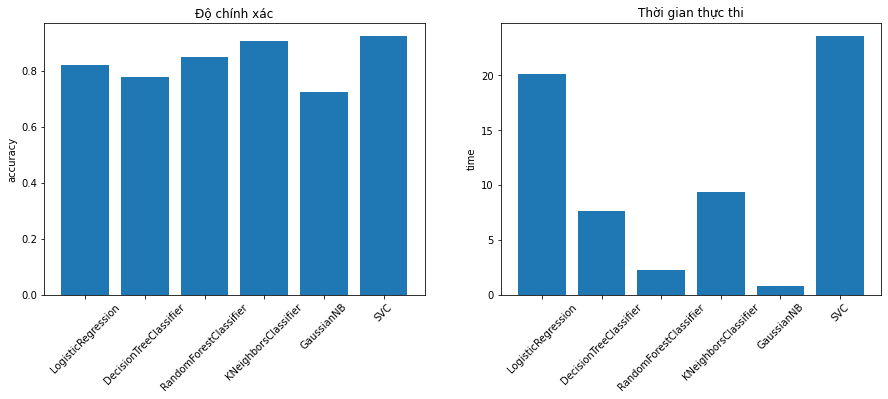

In [26]:
fig = plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.bar(cv_df['model_name'], cv_df['accuracy'])
plt.ylabel('accuracy')
plt.xticks(rotation = 45)
plt.title("Độ chính xác")

plt.subplot(1, 2, 2)
plt.bar(cv_df['model_name'], cv_df['time'])
plt.ylabel('time')
plt.xticks(rotation = 45)
plt.title("Thời gian thực thi")

fig.savefig(VISUALIZE_PATH + 'So sánh các thuật toán.png', bbox_inches = 'tight') 
plt.show()

#### => Do đây là 1 bộ dữ liệu y tế, ta nên ưu tiên chọn thuật toán nào có độ chính xác cao nhất. Ở đây ta thấy SVM và KNN có độ chính xác khá cao nhưng thời gian tính toán quá lâu nên ta sẽ chọn Random Forest có độ chính xác chỉ thấp hơn 1 ít nhưng lại có thời gian tính toán nhanh hơn đáng kể so với 2 thuật toán trên

### b. Áp dụng Grid SearchCV để tìm mô hình tốt nhất

In [27]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(features, targets, test_size = 0.2)

In [28]:
from sklearn.model_selection import GridSearchCV
param_dist = {
    "max_depth" : [70, 90, None],
    "n_estimators" : [100, 200, 300],
    "max_features" : ['auto', 'sqrt', 'log2'],
#     "min_samples_split" : [3, 4, 5],
#     "min_samples_leaf" : [2, 5, 10],
    "bootstrap" : [True, False],
}

In [29]:
grid = GridSearchCV(
    estimator = RandomForestClassifier(n_jobs = -1), 
    param_grid = param_dist, 
    cv = 5, 
    n_jobs = -1, # Giảm thời gian tính toán 
    verbose = 2,
)
grid.fit(X_train, np.ravel(Y_train))

best_model = grid.best_estimator_
best_model

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  2.2min finished


RandomForestClassifier(bootstrap=False, max_depth=70, n_estimators=300,
                       n_jobs=-1)

In [30]:
print("Độ chính xác cao nhất:", grid.best_score_)
print("Các tham số tốt nhất cho mô hình:", grid.best_params_)

Độ chính xác cao nhất: 0.910293107396382
Các tham số tốt nhất cho mô hình: {'bootstrap': False, 'max_depth': 70, 'max_features': 'auto', 'n_estimators': 300}


In [31]:
cv_results = grid.cv_results_
pd.DataFrame(cv_results).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.875026,0.181218,7.333614,0.180033,True,70,auto,100,"{'bootstrap': True, 'max_depth': 70, 'max_feat...",0.881612,0.906801,0.901763,0.891688,0.893939,0.895161,0.008674,34
1,7.980872,0.162617,1.235153,0.161586,True,70,auto,200,"{'bootstrap': True, 'max_depth': 70, 'max_feat...",0.884131,0.911839,0.889169,0.891688,0.896465,0.894658,0.009468,36
2,9.117199,0.043887,0.162611,0.020742,True,70,auto,300,"{'bootstrap': True, 'max_depth': 70, 'max_feat...",0.876574,0.914358,0.899244,0.886650,0.896465,0.894658,0.012677,36
3,7.885128,0.191329,1.296190,0.193761,True,70,sqrt,100,"{'bootstrap': True, 'max_depth': 70, 'max_feat...",0.879093,0.899244,0.886650,0.889169,0.891414,0.889114,0.006548,49
4,4.414612,1.140740,3.264984,1.089057,True,70,sqrt,200,"{'bootstrap': True, 'max_depth': 70, 'max_feat...",0.891688,0.896725,0.904282,0.884131,0.904040,0.896173,0.007656,30


In [32]:
mean_list = ['mean_fit_time', 'mean_test_score', 'std_test_score']
mean_results = [cv_results[result].mean() for result in mean_list]
pd.DataFrame({ 'cv_results': mean_list, 'mean' : mean_results })

,cv_results,mean
0,mean_fit_time,6.377497
1,mean_test_score,0.898160
2,std_test_score,0.010633


## 5. Đánh giá model

In [33]:
model_name = type(best_model).__name__.replace('Classifier', '')
print('Độ chính xác trên tập test:', best_model.score(x_test, y_test))

Độ chính xác trên tập test: 0.9154929577464789


In [34]:
y_pred = best_model.predict(x_test)
df = pd.DataFrame({
    'Actual'     : y_test.label, 
    'Prediction' : y_pred
})  
df.head()

,Actual,Prediction
95,1,1
1136,1,0
2051,0,0
628,1,1
1429,0,0


### Confusion matrix

<img src="https://github.com/thangnch/photos/blob/master/Screen%20Shot%202020-06-16%20at%2014.00.30.png?raw=true" width="540" style="display:inline-block;"/>
<img src="https://nlpforhackers.io/wp-content/uploads/2017/01/Precision-Recall.png" width="430" style="display:inline-block;">

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

def plot_cfmatrix(cf_matrix, fig_name = ''):
    if fig_name != '': fig = plt.figure(figsize = (7, 5))

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, fmt = '', annot = labels, cmap="YlGnBu", annot_kws = {"size": 15})
    if fig_name != '': 
        fig.savefig(VISUALIZE_PATH + fig_name, bbox_inches = 'tight') 
        plt.show()

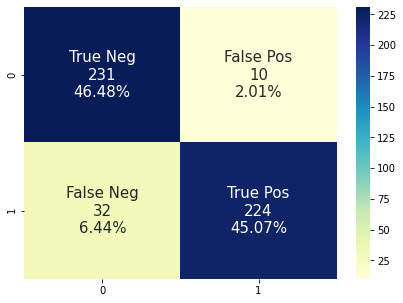

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       241
           1       0.96      0.88      0.91       256

    accuracy                           0.92       497
   macro avg       0.92      0.92      0.92       497
weighted avg       0.92      0.92      0.92       497



In [36]:
cf_matrix = confusion_matrix(y_test, y_pred)
plot_cfmatrix(cf_matrix, model_name + ' Confusion Matrix.png')
print(classification_report(y_test, y_pred))

Đầu tiên nhìn dòng số 1 trong Confusion matrix. Ta thấy trong dữ liệu có 241 người mắc Covid-19 và được model nhận đúng 231 người. Có 10 người bị dự đoán nhầm thành không mắc Covid-19. Khá tốt.

Bây giờ nhìn dòng số 2, tổng dữ liệu của chúng ta có 256 người không mắc Covid-19. Trong đó 32 người đã bị nhận nhầm thành mắc Covid-19 và 224 người đã được nhận đúng là không mắc Covid-19.

Tiếp theo là Precision, Precision càng lớn có nghĩa là độ chính xác của các điểm tìm được càng cao. Ví dụ như bài trên trong 241 điểm được nhận là Positive thì có 231 điểm là TP và 10 điểm là FP nên ta có Precision khá cao. Precision sẽ cần được coi trọng hơn khi lựa chọn model với các bài toán cụ thể khi mà việc nhận nhầm False Positive mang lại kêt quả tồi tệ. Ví dụ với bài toán chặn Spam Mail, khi đó việc nhận nhầm FP (nhầm 1 mail thường thành mail spam) sẽ làm ảnh hưởng đến công việc của người dùng vì miss một mail quan trọng. Ở trường hợp bài toán này thì không

Recall nên được gán trọng số cao hơn khi cân nhắc lựa chọn model tốt nhất khi mà việc nhận nhầm các nhãn Positive thực thành False Negative mang lại hậu quả khôn lường. Ví dụ như bài toán Covid-19 bên trên, việc nhận nhầm người mắc bệnh thành người bình thường sẽ rất là nguy hiểm

Cuối cùng là F1-score để cân bằng giữa 2 đại lượng Precision và Recall. Ở đây, cả 3 thông số đều trên đều khá cao chứng tỏ model đang dùng khá là tốt

### ROC Curve

<img src="https://miro.medium.com/max/1278/1*xp3hdwxxwrcue2mP6gAV5A.png" width="450" />

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(y_test, y_pred, fig_name=''):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    if fig_name != '': fig = plt.figure(figsize=(7, 5))
    plt.plot([0, 1], [0, 1],'r--')
    plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    
    if fig_name != '': 
        fig.savefig(VISUALIZE_PATH + fig_name, bbox_inches = 'tight') 
        plt.show()

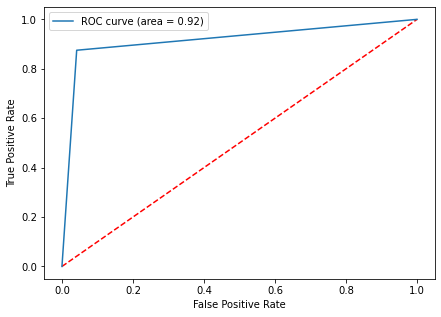

In [38]:
plot_roc_curve(y_test, y_pred, model_name + ' ROC Curve.png')

Đường ROC để ta thấy lên mối quan hệ giữa TPR và FPR.Ở đây, ta thấy vùng nằm dưới đường ROC (Area Under the Curve – AUC) có giá trị khá cao (0.9) có nghĩa là đường ROC càng cong sát phía trên và model sử dụng là khá tốt

## 6. Export model

In [39]:
import pickle
pkl_filename = MODELS_PATH + model_name + ".pkl"

In [40]:
with open(pkl_filename, 'wb') as file:  
    pickle.dump(best_model, file)

In [41]:
with open(pkl_filename, 'rb') as file:  
    model = pickle.load(file)

### Predict từ ảnh bất kỳ

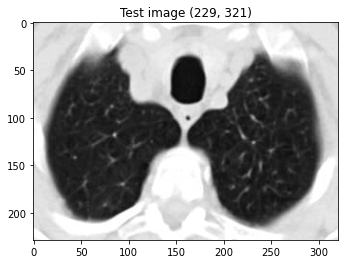

In [42]:
img_test = cv2.imread(TEST_IMAGE, 0)
plt.imshow(img_test, cmap = 'gray')
plt.title('Test image ' + str(img_test.shape))
plt.show()

In [43]:
resize_img = cv2.resize(img_test, (WIDTH, HEIGHT))
reshape_img = resize_img.reshape(-1, WIDTH * HEIGHT)
scaled_img = scaler.transform(reshape_img)
classes = model.predict(scaled_img)

In [44]:
if classes == 1: print('Phổi nhiễm COVID 19')
else: print('Phổi không nhiễm COVID 19')

Phổi không nhiễm COVID 19


# Xây dựng Neural Network cho bài toán Deep Learning

In [8]:
import tensorflow as tf
import warnings
tf.__version__

'2.4.0'

In [9]:
# Kiểm tra GPU trong máy
# tf.config.list_physical_devices('GPU')
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please ensure you have installed TensorFlow correctly')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

Default GPU Device: /device:GPU:0


In [10]:
TRAIN_PATH = 'dataset/train/'
TEST_PATH  = 'dataset/test/'
TRAINS_PER_CLASS = 1000
EPOCHS = 50
BATCH_SIZE = 64

# Khi sử dụng các đối số validation_split và subset, 
# phải đảm bảo chỉ định 1 SEED ngẫu nhiên hoặc để shuffle = False,
# để tập validation và train không bị chồng chéo nhau
SEED = 42 

## 1. Chuẩn bị dữ liệu cho model

### a. Tạo mới thư mục

In [11]:
import shutil
import random

In [12]:
def move_files(img_names, src_path, des_path, num_of_files):
    num_of_files = min(len(img_names), num_of_files)
    print('Di chuyển', num_of_files, 'hình ảnh từ folder', src_path, 'tới', des_path)
    
    for name in random.sample(img_names, num_of_files):
        path = os.path.join(src_path, name)
        shutil.move(path, des_path)
        img_names.remove(name)

In [13]:
os.makedirs(TRAIN_PATH + 'COVID')
os.makedirs(TRAIN_PATH + 'NONCOVID')

In [14]:
os.makedirs(TEST_PATH  + 'COVID')
os.makedirs(TEST_PATH  + 'NONCOVID')

### b. Phân chia lại dữ liệu

In [15]:
# Tập train
move_files(COVID_IMAGE_NAMES, COVID_PATH, TRAIN_PATH + 'COVID', TRAINS_PER_CLASS)
move_files(NONCOVID_IMAGE_NAMES, NONCOVID_PATH, TRAIN_PATH + 'NONCOVID', TRAINS_PER_CLASS)

Di chuyển 1000 hình ảnh từ folder dataset/COVID/ tới dataset/train/COVID
Di chuyển 1000 hình ảnh từ folder dataset/NONCOVID/ tới dataset/train/NONCOVID


In [16]:
# Tập test
move_files(COVID_IMAGE_NAMES,  COVID_PATH, TEST_PATH  + 'COVID', len(COVID_IMAGE_NAMES))
move_files(NONCOVID_IMAGE_NAMES, NONCOVID_PATH, TEST_PATH  + 'NONCOVID', len(NONCOVID_IMAGE_NAMES))

Di chuyển 252 hình ảnh từ folder dataset/COVID/ tới dataset/test/COVID
Di chuyển 229 hình ảnh từ folder dataset/NONCOVID/ tới dataset/test/NONCOVID


In [17]:
shutil.rmtree(COVID_PATH, ignore_errors = True)
shutil.rmtree(NONCOVID_PATH, ignore_errors = True)

### c. Đọc dữ liệu

In [18]:
from tensorflow.keras.preprocessing import image
train_generator = image.ImageDataGenerator(
    rescale = 1./255,  
    width_shift_range = 0.2, 
    height_shift_range = 0.2,
    validation_split = 0.2
)
test_generator = image.ImageDataGenerator(
    rescale = 1./255,    
    width_shift_range = 0.2, 
    height_shift_range = 0.2,
)

In [19]:
generated_train_data = train_generator.flow_from_directory(
    TRAIN_PATH,
    target_size = (WIDTH, HEIGHT),
    batch_size = BATCH_SIZE,
    class_mode = 'binary',
    subset = 'training',
    seed = SEED
#     shuffle = False,
)

Found 1600 images belonging to 2 classes.


In [20]:
generated_valid_data = train_generator.flow_from_directory(
    TRAIN_PATH,
    target_size = (WIDTH, HEIGHT),
    batch_size = BATCH_SIZE,
    class_mode = 'binary',
    subset = 'validation',
    seed = SEED
#     shuffle = False,
)

Found 400 images belonging to 2 classes.


In [21]:
generated_test_data = test_generator.flow_from_directory(
    TEST_PATH,
    target_size = (WIDTH, HEIGHT),
    class_mode = 'binary',
    shuffle = False
)

Found 481 images belonging to 2 classes.


## 2. Thiết lập model

### a. Cài đặt cấu trúc mạng

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout

In [23]:
cnn_model = Sequential()

cnn_model.add(Conv2D(16, (3, 3), activation = 'relu', input_shape = (WIDTH, HEIGHT, 3)))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(32, (3, 3), activation = 'relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(1024, activation = 'relu'))
cnn_model.add(Dropout(0.2))

cnn_model.add(Dense(256, activation = 'relu'))
cnn_model.add(Dropout(0.2))

cnn_model.add(Dense(1, activation = 'sigmoid'))
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 73, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 73, 73, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 34, 34, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

In [24]:
from tensorflow.keras.optimizers import Adam
cnn_model.compile(optimizer = Adam(lr = 1e-5), loss = 'binary_crossentropy', metrics = ['accuracy'])

### b. Huấn luyện

In [25]:
class Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.85:
            self.model.stop_training = True

In [26]:
cnn_history = cnn_model.fit(
    generated_train_data, 
    validation_data = generated_valid_data,
    validation_steps = generated_valid_data.n // BATCH_SIZE,
    steps_per_epoch = generated_train_data.n // BATCH_SIZE,
    callbacks = [Callback()], # Early Stopping
    epochs = EPOCHS,
    verbose = 1,
)
cnn_model.save(MODELS_PATH + 'CNN.h5')

Epoch 1/50
25/25 [==============================] - 8s 260ms/step - loss: 0.9393 - accuracy: 0.5254 - val_loss: 0.6927 - val_accuracy: 0.4974
Epoch 2/50
25/25 [==============================] - 6s 232ms/step - loss: 0.7999 - accuracy: 0.5770 - val_loss: 0.6880 - val_accuracy: 0.4896
Epoch 3/50
25/25 [==============================] - 6s 232ms/step - loss: 0.7571 - accuracy: 0.6062 - val_loss: 0.6780 - val_accuracy: 0.5260
Epoch 4/50
25/25 [==============================] - 6s 232ms/step - loss: 0.6746 - accuracy: 0.6666 - val_loss: 0.6706 - val_accuracy: 0.5625
Epoch 5/50
25/25 [==============================] - 6s 232ms/step - loss: 0.6830 - accuracy: 0.6447 - val_loss: 0.6616 - val_accuracy: 0.6120
Epoch 6/50
25/25 [==============================] - 6s 233ms/step - loss: 0.6204 - accuracy: 0.6689 - val_loss: 0.6496 - val_accuracy: 0.6354
Epoch 7/50
25/25 [==============================] - 6s 232ms/step - loss: 0.6473 - accuracy: 0.6604 - val_loss: 0.6406 - val_accuracy: 0.6589
Epoch 

## 3. Đánh giá model

In [27]:
y_test = generated_test_data.classes
y_pred_cnn = cnn_model.predict(generated_test_data, verbose = 1) > 0.5

16/16 [==============================] - 2s 89ms/step


In [28]:
def get_pred_key(val):
    for key, value in generated_train_data.class_indices.items():
        if val == value: return key
    return None

In [29]:
df = pd.DataFrame({
    'Actual'     : generated_test_data.filenames, 
    'CNN prediction' : [get_pred_key(val) for val in y_pred_cnn],
})  
df.head()

,Actual,CNN prediction
0,COVID\Covid (1001).png,COVID
1,COVID\Covid (1008).png,COVID
2,COVID\Covid (1009).png,COVID
3,COVID\Covid (1013).png,COVID
4,COVID\Covid (1020).png,COVID


In [30]:
df.tail()

,Actual,CNN prediction
476,NONCOVID\Non-Covid (981).png,NONCOVID
477,NONCOVID\Non-Covid (983).png,NONCOVID
478,NONCOVID\Non-Covid (984).png,NONCOVID
479,NONCOVID\Non-Covid (991).png,NONCOVID
480,NONCOVID\Non-Covid (999).png,NONCOVID


In [31]:
def plot_history(history, model_name = ''):
    fig, axes = plt.subplots(1, 2, figsize = (15, 5))
    
    axes[0].plot(history.history['accuracy'], linestyle = 'solid', marker = 'o', color = 'crimson', label = 'Train')
    axes[0].plot(history.history['val_accuracy'], linestyle = 'solid', marker = 'o', color = 'dodgerblue', label = 'Validation')
    axes[0].set_xlabel('Epochs', fontsize = 14)
    axes[0].set_ylabel('Accuracy',fontsize = 14)
    axes[0].set_title(model_name + ' accuracy', fontsize = 14)
    axes[0].legend(loc = 'best')
    
    axes[1].plot(history.history['loss'], linestyle = 'solid', marker = 'o', color = 'crimson', label = 'Train')
    axes[1].plot(history.history['val_loss'], linestyle = 'solid', marker = 'o', color = 'dodgerblue', label = 'Validation')
    axes[1].set_xlabel('Epochs', fontsize = 14)
    axes[1].set_ylabel('Loss',fontsize = 14)
    axes[1].set_title(model_name + ' loss', fontsize = 14)
    axes[1].legend(loc = 'best')
    
    fig.savefig(VISUALIZE_PATH + model_name + ' evaluation.png', bbox_inches = 'tight') 
    plt.show()

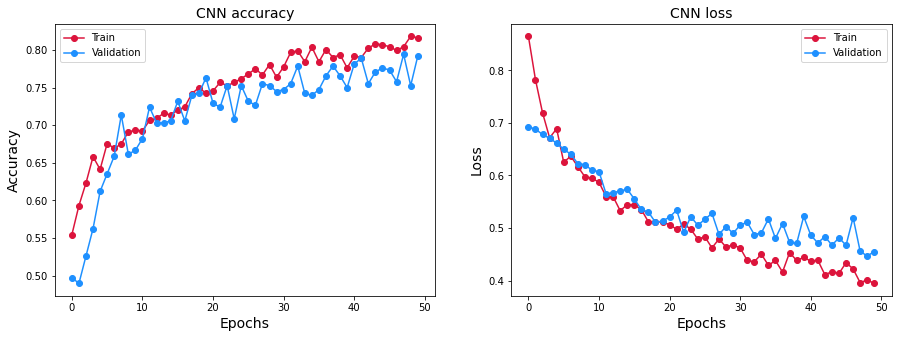

In [32]:
plot_history(cnn_history, 'CNN')

### Confusion matrix

In [33]:
cf_matrix_cnn = confusion_matrix(y_test, y_pred_cnn)
print(classification_report(y_test, y_pred_cnn))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84       252
           1       0.79      0.91      0.84       229

    accuracy                           0.84       481
   macro avg       0.85      0.84      0.84       481
weighted avg       0.85      0.84      0.84       481



Cả 3 thông số F1-score, Precision, Recall của mô hình đều khá tốt

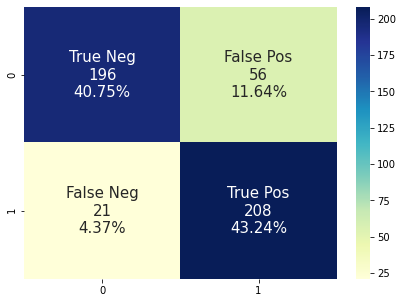

In [34]:
fig = plt.figure(figsize = (7, 5))
plot_cfmatrix(cf_matrix_cnn)
fig.savefig(VISUALIZE_PATH + 'CNN Confusion Matrix.png', bbox_inches = 'tight') 
plt.show()

### ROC Curve

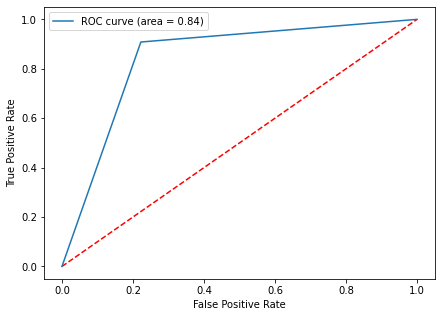

In [35]:
fig = plt.figure(figsize = (7, 5))
plot_roc_curve(y_test, y_pred_cnn)
fig.savefig(VISUALIZE_PATH + 'CNN ROC Curve.png', bbox_inches = 'tight') 
plt.show()

## 4. Dự đoán từ ảnh bất kỳ

In [36]:
img_test = image.load_img(TEST_IMAGE, target_size = (WIDTH, HEIGHT))
img_test = image.img_to_array(img_test) / 255
img_test = np.expand_dims(img_test, axis = 0)
img_test.shape

(1, 75, 75, 3)

In [39]:
cnn_model = tf.keras.models.load_model(MODELS_PATH + 'CNN.h5')
classes = cnn_model.predict(img_test)
if classes > 0.5: print('Phổi không nhiễm COVID 19')
else: print('Phổi nhiễm COVID 19')

Phổi không nhiễm COVID 19


### Trực quan hóa cấu trúc mạng 

In [40]:
np.seterr(divide = 'ignore', invalid = 'ignore')
layer_names = [layer.name for layer in cnn_model.layers]
output_layers = [layer.output for layer in cnn_model.layers]

In [41]:
from tensorflow.keras.models import Model
visualization_model = Model(inputs = cnn_model.input, outputs = output_layers)
successive_feature_maps = visualization_model.predict(img_test)

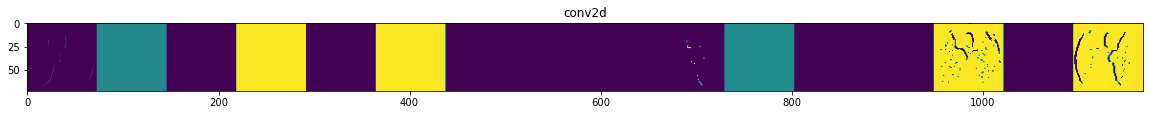

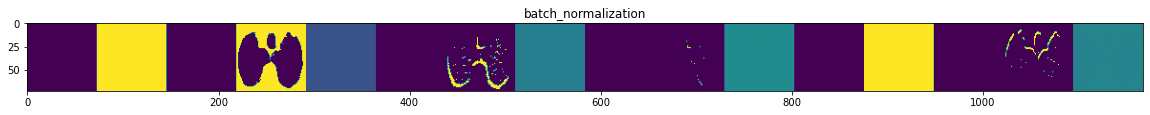

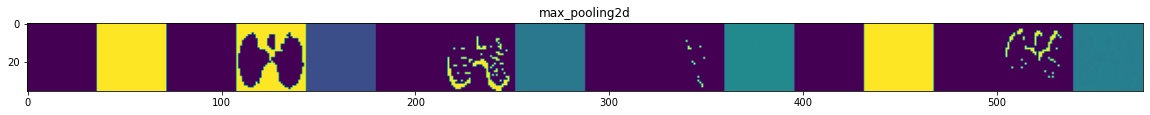

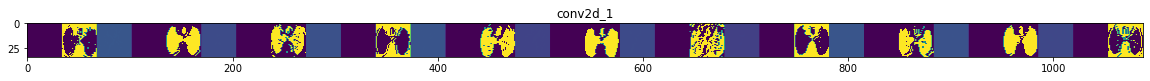

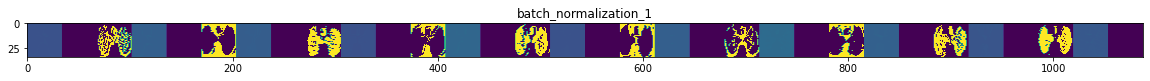

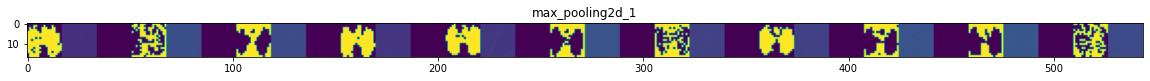

In [42]:
plt.rcParams.update({'figure.max_open_warning': 0})
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        display_grid = np.zeros((size, size * n_features))

        for i in range(n_features):
            img_test = (feature_map[0, :, :, i] - img_test.mean()) * 64 / img_test.std()
            img_test = np.clip(img_test + 128, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = img_test

        plt.figure(figsize = (20, 20 / n_features))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')